<a href="https://colab.research.google.com/github/joaovcar/trabalho-com-amianto-por-empresas/blob/main/Amianto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo sobre a relação de empresas que trabalham com amianto e índices de mortalidade por intoxicação em regiões do Brasil

Partindo da exploração de dados abertos do Governo, observa-se a relação de empresas que trabalham com amianto, em diversos estados do país e como isso pode estar relacionado às taxas de mortalidade por mesotelioma(tipo de câncer que se agrava devido contanto com amianto) por região, estado e faixa etária no país.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Empresas que trabalham com amianto no Brasil

In [3]:
empresas_amianto = pd.read_csv("https://raw.githubusercontent.com/joaovcar/trabalho-com-amianto-por-empresas/refs/heads/main/cadastro_empresas_remocao_asbesto_amianto-20052025-1.csv")
empresas_amianto.head(33)

,Numero_do_cadastro,Nome_da_empresa,CNPJ,Estado,Vencimento,Numero_de_trabalhadores,Numero_de_trabalhadores_com_contato_direto
0,185.0,RIP Serviços Industriais,07.522.191/0001-91,SP,10/07/2026,7886,67.0
1,193.0,Catarinense Engenharia Ambiental S.A.,03.720.956/0001-56,SC,24/05/2026,55,2.0
2,199.0,Pillar Engenharia e Manutenção Ltda,00.204.874/0001-60,MA,10/07/2026,513,NaN
3,204.0,Essencis MG Soluções Ambientais,07.004.980/0001-40,MG,18/01/2026,172,21.0
4,217.0,EMSERE Construções,01.683.591/0001-01,MG,18/03/2027,240,NaN
5,236.0,Fábio Bruno Construções Ltda,04.606.738/0001-58,RJ,18/03/2027,30,10.0
6,242.0,Caldeiraria e Usinagem Icaraí Ltda,20.182.485/0001-99,SP,19/05/2027,14,8.0
7,251.0,Deilton Daniel dos Santos Demolidora EPP,30.178.606/0001-82,SP,11/11/2026,6,0.0
8,253.0,Zulg Construções e Comércio de materiais para ...,06.328.988/0001-07,SP,04/12/2026,8,0.0
9,259.0,Demolidora e Madeireira Otabol,19.713.902/0001-01,SP,10/07/2026,120,17.0


In [4]:
empresas_amianto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Numero_do_cadastro                          29 non-null     float64
 1   Nome_da_empresa                             30 non-null     object 
 2   CNPJ                                        30 non-null     object 
 3   Estado                                      30 non-null     object 
 4   Vencimento                                  30 non-null     object 
 5   Numero_de_trabalhadores                     30 non-null     int64  
 6   Numero_de_trabalhadores_com_contato_direto  20 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


informação sobre conteúdo não nulo nas tabelas

In [5]:
empresas_amianto.describe()

,Numero_do_cadastro,Numero_de_trabalhadores,Numero_de_trabalhadores_com_contato_direto
count,29.000000,30.000000,20.000000
mean,270.068966,321.133333,11.850000
std,38.946787,1432.528046,15.658443
min,185.000000,1.000000,0.000000
25%,251.000000,6.500000,2.750000
50%,289.000000,15.000000,7.000000
75%,301.000000,73.500000,14.250000
max,308.000000,7886.000000,67.000000


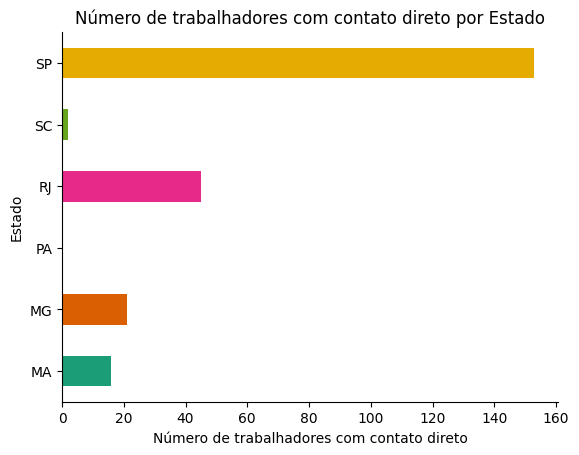

In [7]:
# @title Número de trabalhadores com contato direto por Estado




workers_by_state = empresas_amianto.groupby('Estado')['Numero_de_trabalhadores_com_contato_direto'].sum()


workers_by_state.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.title('Número de trabalhadores com contato direto por Estado')
plt.xlabel('Número de trabalhadores com contato direto')
plt.ylabel('Estado')


plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

Estados que possuem o maior número de trabalhadores em contato direto com Amianto

Index(['Numero_do_cadastro', 'Nome_da_empresa', 'CNPJ', 'Estado', 'Vencimento',
       'Numero_de_trabalhadores',
       'Numero_de_trabalhadores_com_contato_direto'],
      dtype='object')


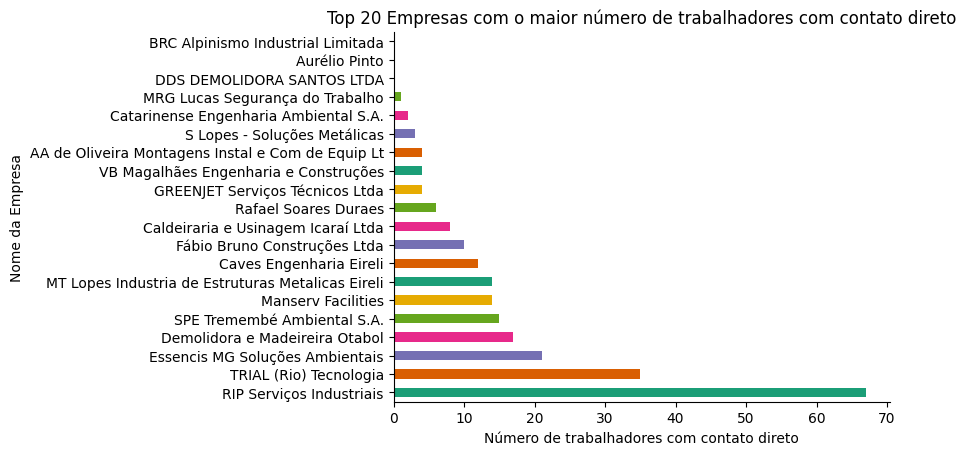

In [8]:
# @title Empresas com o maior número de trabalhadores com contato direto



print(empresas_amianto.columns)


trabalhadores_por_emp = empresas_amianto.groupby('Nome_da_empresa')['Numero_de_trabalhadores_com_contato_direto'].sum()


top_empresas = trabalhadores_por_emp.sort_values(ascending=False)


n_top_empresas = 20
top_empresas = top_empresas.head(n_top_empresas)


top_empresas.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.title(f'Top {n_top_empresas} Empresas com o maior número de trabalhadores com contato direto')
plt.xlabel('Número de trabalhadores com contato direto')
plt.ylabel('Nome da Empresa') # Update this label if the column name is different


plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()
plt.show()

Empresas com o maior número de trabalhadores em contato direto com amianto

# Taxa de mortalidade por Mesotelioma no brasil(anos 1980 - 2010) por estado e região

Dados coletados das seguintes referências:
Pedra F, de Oliveira da Silva P, E. Mattos I, A. Castro H. Mortalidade por Mesotelioma no Brasil, 1980 a 2010. Rev. Bras. Cancerol. [Internet]. 30º de setembro de 2014 [citado 30º de maio de 2025];60(3):199-206. Disponível em: https://rbc.inca.gov.br/index.php/revista/article/view/464

e
https://datasus.saude.gov.br/

In [ ]:
mortes_por_regiao = pd.read_csv("https://raw.githubusercontent.com/joaovcar/trabalho-com-amianto-por-empresas/refs/heads/main/mortalidade%20por%20mesotelioma.csv?token=GHSAT0AAAAAADEUHDHELMDLBL3HAB23R3TW2B2AD6Q")
mortes_por_regiao.head()

,Estado,Região,Número de Mortes (1980-2010),Percentual de Mortes Totais,Taxa Anual Estimada por Milhão
0,São Paulo,Sudeste,1142,30.7%,1.00
1,Rio de Janeiro,Sudeste,577,15.5%,1.29
2,Minas Gerais,Sudeste,416,11.2%,0.75
3,Rio Grande do Sul,Sul,379,10.2%,1.20
4,Outros estados,Variados,1204,32.4%,NaN


In [ ]:


mortes_por_regiao.describe()

,Número de Mortes (1980-2010),Taxa Anual Estimada por Milhão
count,5.000000,4.000000
mean,743.600000,1.060000
std,399.593919,0.239583
min,379.000000,0.750000
25%,416.000000,0.937500
50%,577.000000,1.100000
75%,1142.000000,1.222500
max,1204.000000,1.290000


In [ ]:


mortes_por_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estado                          5 non-null      object 
 1   Região                          5 non-null      object 
 2   Número de Mortes (1980-2010)    5 non-null      int64  
 3   Percentual de Mortes Totais     5 non-null      object 
 4   Taxa Anual Estimada por Milhão  4 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


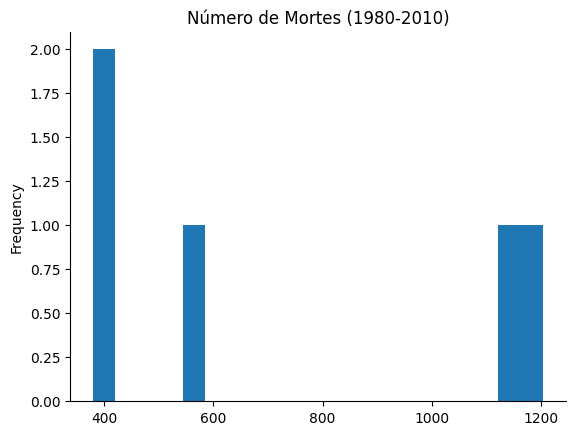

In [ ]:
# @title Número de Mortes (1980-2010)

from matplotlib import pyplot as plt
mortes_por_regiao['Número de Mortes (1980-2010)'].plot(kind='hist', bins=20, title='Número de Mortes (1980-2010)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-50-6eeb721df525>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(mortes_por_regiao, x='Número de Mortes (1980-2010)', y='Região', inner='stick', palette='Dark2')


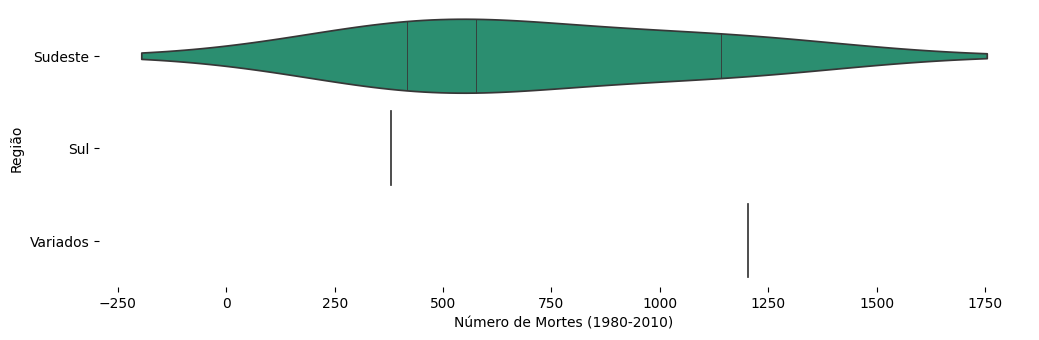

In [ ]:
# @title Região vs Número de Mortes (1980-2010)


figsize = (12, 1.2 * len(mortes_por_regiao['Região'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(mortes_por_regiao, x='Número de Mortes (1980-2010)', y='Região', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-51-94ba21fd5863>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(mortes_por_regiao, x='Número de Mortes (1980-2010)', y='Estado', inner='stick', palette='Dark2')


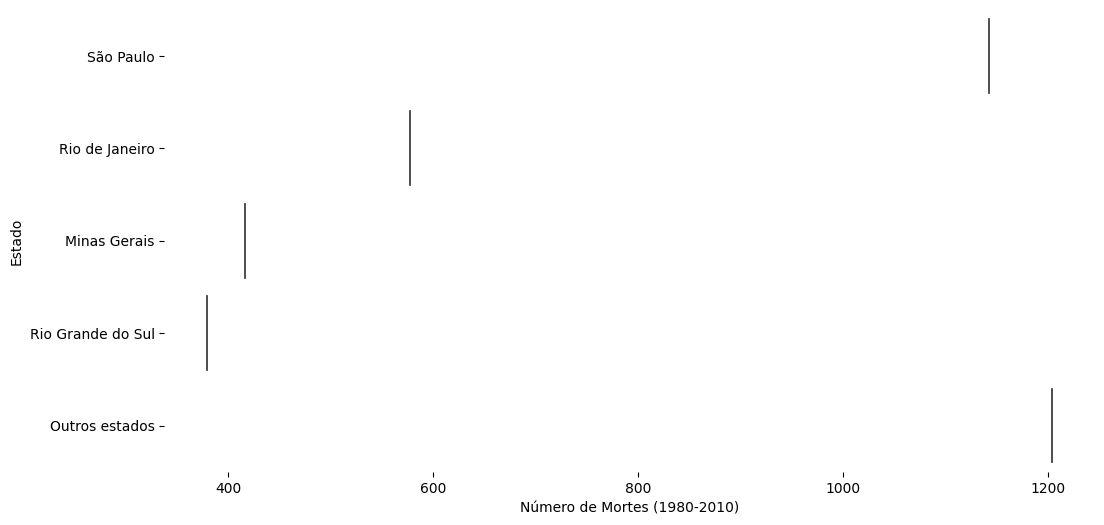

In [ ]:
# @title Estado vs Número de Mortes (1980-2010)


figsize = (12, 1.2 * len(mortes_por_regiao['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(mortes_por_regiao, x='Número de Mortes (1980-2010)', y='Estado', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Mortalidade oriunda da intoxicação por amianto e mesotelioma por faixa etária (anos 1996 - 2017) no Brasil

Considerando dados do IBGE, a faixa etária média de um trabalhador no Brasil está no intervalo dos 30 aos 59 anos. Portanto, os dados da tabela abaixo são consideráveis para a síntese do que está sendo trabalhado considerando os padrões já abordados.

os dados abaixos foram retirados do seguinte artigo: https://www.sciencedirect.com/science/article/pii/S2093791122000580

In [ ]:
faixa_etaria_mortalidade = pd.read_csv("https://raw.githubusercontent.com/joaovcar/trabalho-com-amianto-por-empresas/refs/heads/main/faixa_etaria_mortalidade.csv?token=GHSAT0AAAAAADEUHDHF5KB67JGEGRO54RUO2B2AJZA")
faixa_etaria_mortalidade.head(8)

,Gênero,Variável,Faixa Etária (anos),Pleura n,Pleura %,Peritônio n,Peritônio %,Pericárdio n,Pericárdio %,Outros n,Outros %,Não Especificado n,Não Especificado %,Total n,Total %
0,Homens,Total,Total,626,44.6,186,13.2,29,2.1,87,6.2,476,33.9,1404,100.0
1,Homens,Faixa Etária (anos),30–50,106,16.9,43,23.1,7,24.1,16,18.4,93,19.5,265,18.9
2,Homens,Faixa Etária (anos),51–64,220,35.1,64,34.4,12,41.4,28,32.2,165,34.7,489,34.8
3,Homens,Faixa Etária (anos),>64,300,47.9,79,42.5,10,34.5,43,49.4,218,45.8,650,46.3
4,Mulheres,Total,Total,380,37.9,229,22.9,13,1.3,63,6.3,316,31.6,1001,100.0
5,Mulheres,Faixa Etária (anos),30–50,70,18.4,28,12.2,5,38.5,14,22.2,52,16.5,169,16.9
6,Mulheres,Faixa Etária (anos),51–64,128,33.7,58,25.3,5,38.5,17,27.0,96,30.4,304,30.4
7,Mulheres,Faixa Etária (anos),>64,182,47.9,143,62.4,3,23.1,32,50.8,168,53.2,528,52.7


In [ ]:

faixa_etaria_mortalidade.describe()

,Pleura n,Pleura %,Peritônio n,Peritônio %,Pericárdio n,Pericárdio %,Outros n,Outros %,Não Especificado n,Não Especificado %,Total n,Total %
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,251.500000,35.300000,103.750000,29.500000,10.500000,25.43750,37.500000,26.562500,198.000000,33.200000,601.250000,50.000000
std,182.952765,12.174564,73.394725,16.658589,8.280787,16.09214,25.873318,17.120742,139.561558,12.180077,416.243661,33.164094
min,70.000000,16.900000,28.000000,12.200000,3.000000,1.30000,14.000000,6.200000,52.000000,16.500000,169.000000,16.900000
25%,122.500000,29.875000,54.250000,20.475000,5.000000,17.85000,16.750000,15.375000,95.250000,27.675000,294.250000,27.525000
50%,201.000000,36.500000,71.500000,24.200000,8.500000,29.30000,30.000000,24.600000,166.500000,32.750000,508.500000,40.550000
75%,320.000000,45.425000,153.750000,36.425000,12.250000,38.50000,48.000000,36.500000,242.500000,37.475000,737.750000,64.525000
max,626.000000,47.900000,229.000000,62.400000,29.000000,41.40000,87.000000,50.800000,476.000000,53.200000,1404.000000,100.000000


In [ ]:

faixa_etaria_mortalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gênero               8 non-null      object 
 1   Variável             8 non-null      object 
 2   Faixa Etária (anos)  8 non-null      object 
 3   Pleura n             8 non-null      int64  
 4   Pleura %             8 non-null      float64
 5   Peritônio n          8 non-null      int64  
 6   Peritônio %          8 non-null      float64
 7   Pericárdio n         8 non-null      int64  
 8   Pericárdio %         8 non-null      float64
 9   Outros n             8 non-null      int64  
 10  Outros %             8 non-null      float64
 11  Não Especificado n   8 non-null      int64  
 12  Não Especificado %   8 non-null      float64
 13  Total n              8 non-null      int64  
 14  Total %              8 non-null      float64
dtypes: float64(6), int64(6), object(3)
memory us